<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Setup---imports" data-toc-modified-id="Setup---imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setup - imports</a></span></li><li><span><a href="#Setup---output" data-toc-modified-id="Setup---output-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Setup - output</a></span><ul class="toc-item"><li><span><a href="#function-make_path" data-toc-modified-id="function-make_path-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>function make_path</a></span></li><li><span><a href="#set-up-output-configuration" data-toc-modified-id="set-up-output-configuration-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>set up output configuration</a></span></li></ul></li><li><span><a href="#Setup---Functions" data-toc-modified-id="Setup---Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Setup - Functions</a></span><ul class="toc-item"><li><span><a href="#function-plot_precision_recall_n" data-toc-modified-id="function-plot_precision_recall_n-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>function plot_precision_recall_n</a></span></li><li><span><a href="#function-threshold_at_k" data-toc-modified-id="function-threshold_at_k-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>function threshold_at_k</a></span></li><li><span><a href="#function-precision_at_k" data-toc-modified-id="function-precision_at_k-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>function precision_at_k</a></span></li><li><span><a href="#function-recall_at_k" data-toc-modified-id="function-recall_at_k-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>function recall_at_k</a></span></li><li><span><a href="#function-accuracy_at_k" data-toc-modified-id="function-accuracy_at_k-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>function accuracy_at_k</a></span></li><li><span><a href="#function-precision_recall_f1" data-toc-modified-id="function-precision_recall_f1-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>function precision_recall_f1</a></span></li></ul></li></ul></li><li><span><a href="#class-CitationCodingEvaluation" data-toc-modified-id="class-CitationCodingEvaluation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>class CitationCodingEvaluation</a></span></li><li><span><a href="#Load-JSON-files" data-toc-modified-id="Load-JSON-files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load JSON files</a></span></li><li><span><a href="#Process-JSON" data-toc-modified-id="Process-JSON-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Process JSON</a></span></li><li><span><a href="#Evaluate" data-toc-modified-id="Evaluate-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluate</a></span><ul class="toc-item"><li><span><a href="#precision,-recall,-and-accuracy" data-toc-modified-id="precision,-recall,-and-accuracy-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>precision, recall, and accuracy</a></span></li><li><span><a href="#precision,-recall,-and-accuracy-per-publication" data-toc-modified-id="precision,-recall,-and-accuracy-per-publication-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>precision, recall, and accuracy per publication</a></span><ul class="toc-item"><li><span><a href="#false-positives-(FP)" data-toc-modified-id="false-positives-(FP)-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>false positives (FP)</a></span></li><li><span><a href="#false-negatives-(FN)" data-toc-modified-id="false-negatives-(FN)-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>false negatives (FN)</a></span></li><li><span><a href="#output-all-publication-citation-pairs" data-toc-modified-id="output-all-publication-citation-pairs-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>output all publication-citation pairs</a></span></li></ul></li><li><span><a href="#graph-precision-and-recall-at-n" data-toc-modified-id="graph-precision-and-recall-at-n-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>graph precision and recall at n</a></span></li><li><span><a href="#output-results-to-file" data-toc-modified-id="output-results-to-file-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>output results to file</a></span></li></ul></li></ul></div>

# Setup

- Back to [Table of Contents](#Table-of-Contents)

In [1]:
# DEBUG
debug_flag = False

## Setup - imports

- Back to [Table of Contents](#Table-of-Contents)

In [2]:
# imports
import datetime
import json
import matplotlib
import matplotlib.pyplot
import numpy
import os
import pandas as pd
import six

# scikit-learn
import sklearn
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              GradientBoostingClassifier,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## Setup - output

- Back to [Table of Contents](#Table-of-Contents)

### function make_path

- Back to [Table of Contents](#Table-of-Contents)

In [3]:
# function to create a path if it does not exist
def make_path(path_to_make):
    if not os.path.exists(path_to_make):
        print("Creating path {}".format(path_to_make))
        os.makedirs(path_to_make)
    else:
        print("{} already exists".format(path_to_make))

    return path_to_make

### set up output configuration

- Back to [Table of Contents](#Table-of-Contents)

In [4]:
TEAM_NAME = "rcc-08"

In [5]:
# DEBUG
debug_flag = False

# output_to_file flag
output_to_file = True
line_list = None
output_string = None
#output_folder_path = "/data/output"
#output_folder_path = "."
output_folder_path = "/work/evaluate/{}/final/evaluate".format(TEAM_NAME)
make_path( output_folder_path )
results_file_path = "{}/evaluation_results.txt".format( output_folder_path )
precision_recall_graph_path = "{}/precision_recall_graph.pdf".format( output_folder_path )

# if we are outputting to file, start line list.
if ( output_to_file == True ):
    
    # put a list in line_list
    line_list = []
    
#-- END init line list --#

/work/evaluate/rcc-08/final/evaluate already exists


## Setup - Functions

- Back to [Table of Contents](#Table-of-Contents)

### function plot_precision_recall_n

- Back to [Table of Contents](#Table-of-Contents)

In [6]:
def plot_precision_recall_n(y_true, y_prob, model_name, output_path_IN = None ):

    """
    y_true: ls 
        ls of ground truth labels
    y_prob: ls
        ls of predic proba from model
    model_name: str
        str of model name (e.g, LR_123)
    """
    
    # imports
    from sklearn.metrics import precision_recall_curve
    
    # return reference
    details_OUT = {}
    
    # declare variables
    y_score = None
    precision_curve = None
    recall_curve = None
    pr_thresholds = None
    num_above_thresh = None
    pct_above_thresh = None
    pct_above_per_thresh = None
    current_score = None
    above_threshold_list = None
    above_threshold_count = -1
    fig = None
    ax1 = None
    ax2 = None
    
    # store the raw scores in y_score
    y_score = y_prob
    
    # calculate precision-recall curve
    # http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
    # Returns:
    # - precision_curve - Precison values such that element i is the precision of predictions where cutoff is score >= thresholds[ i ] and the last element is 1.
    # - recall_curve - Recall values such that element i is the recall of predictions where cutoff is score >= thresholds[ i ] and the last element is 0.
    # - pr_thresholds - Increasing thresholds on the decision function used to decide 1 or 0, used to calculate precision and recall (looks like it is the set of unique values in the predicted value set).
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve( y_true, y_score )
    
    # get all but the last precision score (1).
    precision_curve = precision_curve[ : -1 ]
    # print( "precision_curve: {}".format( precision_curve ) )
    
    # get all but the last recall score (0).
    recall_curve = recall_curve[ : -1 ]
    # print( "recall_curve: {}".format( recall_curve ) )
    
    # store details
    details_OUT[ "precision" ] = precision_curve
    details_OUT[ "recall" ] = recall_curve
    details_OUT[ "threshold" ] = pr_thresholds
    
    # init loop over thresholds
    pct_above_per_thresh = []
    number_scored = len(y_score)
    
    # loop over thresholds
    for value in pr_thresholds:
        
        # at each threshold, calculate the percent of rows above the threshold.
        above_threshold_list = []
        above_threshold_count = -1
        for current_score in y_score:
            
            # is it at or above threshold?
            if ( current_score >= value ):
                
                # it is either at or above threshold - add to list.
                above_threshold_list.append( current_score )
                
            #-- END check to see if at or above threshold? --#
                
        #-- END loop over scores. --#

        # how many above threshold?
        #num_above_thresh = len(y_score[y_score>=value])
        above_threshold_count = len( above_threshold_list )
        num_above_thresh = above_threshold_count
        
        # percent above threshold
        pct_above_thresh = num_above_thresh / float( number_scored )
        
        # add to list.
        pct_above_per_thresh.append( pct_above_thresh )
        
    #-- END loop over thresholds --#

    details_OUT[ "percent_above" ] = pct_above_per_thresh
    
    # convert to numpy array
    pct_above_per_thresh = numpy.array(pct_above_per_thresh)

    # init matplotlib
    matplotlib.pyplot.clf()
    fig, ax1 = matplotlib.pyplot.subplots()
    
    # plot precision line
    ax1.plot(pct_above_per_thresh, precision_curve, 'b')
    ax1.set_xlabel('percent of population')
    ax1.set_ylabel('precision', color='b')
    ax1.set_ylim(0,1.05)
    
    # plot recall line
    ax2 = ax1.twinx()
    ax2.plot(pct_above_per_thresh, recall_curve, 'r')
    ax2.set_ylabel('recall', color='r')
    ax2.set_ylim(0,1.05)
    
    # finish off graph
    name = model_name
    matplotlib.pyplot.title(name)
    
    # is there an output path?
    if ( ( output_path_IN is not None ) and ( output_path_IN != "" ) ):
    
        # save the figure to file.
        matplotlib.pyplot.savefig( output_path_IN )
    
    #-- END check to see if we output to disk. --#
    
    matplotlib.pyplot.show()

    # clear plot.
    matplotlib.pyplot.clf()
    
    return details_OUT
    
#-- END function plot_precision_recall_n() --#

print( "function plot_precision_recall_n() defined at {}".format( datetime.datetime.now() ) )

function plot_precision_recall_n() defined at 2018-12-04 03:46:24.056558


### function threshold_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [7]:
def threshold_at_k( y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    value_list = None
    threshold_index = -1
    
    # sort values
    value_list = numpy.sort( y_scores )
    
    # reverse order of list
    value_list = value_list[ : : -1 ]
    
    # calculate index of value that is k% of the way through the sorted distribution of scores
    threshold_index = int( k * len( y_scores ) )
    
    # get value that is k% of the way through the sorted distribution of scores
    value_OUT = value_list[ threshold_index ]
    
    print( "Threshold: {}".format( value_OUT ) )
    
    return value_OUT

#-- END function threshold_at_k() --#

print( "function threshold_at_k() defined at {}".format( datetime.datetime.now() ) )

function threshold_at_k() defined at 2018-12-04 03:46:24.072145


### function precision_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [8]:
def precision_at_k( y_true, y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    threshold = None
    
    # get threshold index
    threshold = threshold_at_k( y_scores, k )
    
    # use threshold to generate predicted scores
    y_pred = numpy.asarray( [ 1 if i >= threshold else 0 for i in y_scores ] )
    
    # calculate precision
    value_OUT = precision_score( y_true, y_pred )
    
    return value_OUT

#-- END function precision_at_k() --#

print( "function precision_at_k() defined at {}".format( datetime.datetime.now() ) )

function precision_at_k() defined at 2018-12-04 03:46:24.091699


### function recall_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [9]:
def recall_at_k( y_true, y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    threshold = None
    
    # get threshold index
    threshold = threshold_at_k( y_scores, k )
    
    # use threshold to generate predicted scores
    y_pred = numpy.asarray( [ 1 if i >= threshold else 0 for i in y_scores ] )
    
    # calculate recall
    value_OUT = recall_score( y_true, y_pred )
    
    return value_OUT

#-- END function recall_at_k() --#

print( "function recall_at_k() defined at {}".format( datetime.datetime.now() ) )

function recall_at_k() defined at 2018-12-04 03:46:24.110817


### function accuracy_at_k

- Back to [Table of Contents](#Table-of-Contents)

In [10]:
def accuracy_at_k( y_true, y_scores, k ):
    
    # return reference
    value_OUT = None
    
    # declare variables
    threshold = None
    
    # get threshold index
    threshold = threshold_at_k( y_scores, k )
    
    # use threshold to generate predicted scores
    y_pred = numpy.asarray( [ 1 if i >= threshold else 0 for i in y_scores ] )
    
    # calculate accuracy
    value_OUT = accuracy_score( y_true, y_pred )
    
    return value_OUT

#-- END function accuracy_at_k() --#

print( "function accuracy_at_k() defined at {}".format( datetime.datetime.now() ) )

function accuracy_at_k() defined at 2018-12-04 03:46:24.130209


### function precision_recall_f1

- Back to [Table of Contents](#Table-of-Contents)

In [11]:
# calculation methods
CALCULATION_METHOD_DEFAULT = "default"
CALCULATION_METHOD_BINARY = "binary"
CACLULATION_METHOD_MACRO = "macro"
CALCULATION_METHOD_MICRO = "micro"
CALCULATION_METHOD_WEIGHTED = "weighted"

# return items
RETURN_CONFUSION_MATRIX = "confusion_matrix"
RETURN_METHOD_TO_RESULT_MAP = "method_to_result_map"
RETURN_LINE_LIST = "line_list"

def precision_recall_f1( baseline_list_IN, predicted_list_IN, calculation_methods_list_IN, do_print_IN = True, output_to_file_IN = output_to_file ):

    # return reference
    output_dict_OUT = {}
    
    # declare variables
    output_string = None
    my_line_list = None
    calculation_methods = None
    cm = None
    method_to_result_map = None
    calculation_method = None
    precision = None
    recall = None
    accuracy = None
    F1 = None
    support = None
    
    # declare variables - default algorithm
    default_evaluation = None
    default_precision_list = None
    default_recall_list = None
    default_F1_list = None
    default_support_list = None
    precision_list_length = None
    recall_list_length = None
    F1_list_length = None

    # init
    my_line_list = []
    
    # init - calculation methods to include and lists
    calculation_methods = calculation_methods_list_IN
    baseline_list = baseline_list_IN
    derived_binary_list = predicted_list_IN

    # confusion matrix
    cm = metrics.confusion_matrix( baseline_list, derived_binary_list )
    
    # RETURN - store confusion matrix
    output_dict_OUT[ RETURN_CONFUSION_MATRIX ] = cm

    # output
    output_string = "\nConfusion matrix:\n{}\n\nBinary Key:\n[[ TN, FP ]\n [ FN, TP ]]".format( cm )
    if ( do_print_IN == True ):
        print( output_string )
    #-- END if do_print_IN --#

    # if output to file...
    if ( output_to_file_IN == True ):

        # store line for output
        my_line_list.append( output_string )

    #-- END if output... --#

    # loop over calculation methods
    method_to_result_map = {}
    for calculation_method in calculation_methods:
        
        # RETURN - create map for method
        

        # output
        output_string = "\n==> {}".format( calculation_method )
        if ( do_print_IN == True ):
            print( output_string )
        #-- END if do_print_IN --#

        # if output to file...
        if ( output_to_file_IN == True ):

            # store line for output
            my_line_list.append( output_string )

        #-- END if output... --#

        # binary?  If so, do basic calculations as sanity check.
        if ( calculation_method == CALCULATION_METHOD_BINARY ):

            # calculate precision, recall, accuracy...

            # ==> precision
            precision = metrics.precision_score( baseline_list, derived_binary_list )

            # output
            output_string = "\n- {} metrics.precision_score = {}".format( calculation_method, precision )
            if ( do_print_IN == True ):
                print( output_string )
            #-- END if do_print_IN --#

            # if output...
            if ( output_to_file_IN == True ):

                # store line for output
                my_line_list.append( output_string )

            #-- END if output... --#

            # ==> recall
            recall = metrics.recall_score( baseline_list, derived_binary_list )

            # output
            output_string = "- {} metrics.recall_score = {}".format( calculation_method, recall )
            if ( do_print_IN == True ):
                print( output_string )
            #-- END if do_print_IN --#

            # if output...
            if ( output_to_file_IN == True ):

                # store line for output
                my_line_list.append( output_string )

            #-- END if output... --#

            # ==> accuracy
            accuracy = metrics.accuracy_score( baseline_list, derived_binary_list )

            # output
            output_string = "- {} metrics.accuracy_score = {}".format( calculation_method, accuracy )
            if ( do_print_IN == True ):
                print( output_string )
            #-- END if do_print_IN --#

            # if output...
            if ( output_to_file_IN == True ):

                # store line for output
                my_line_list.append( output_string )

            #-- END if output... --#

        #-- END check to see if CALCULATION_METHOD_BINARY --#

        # calculate based on calculation method.

        # default?
        if ( calculation_method == CALCULATION_METHOD_DEFAULT ):

            # default metrics and F-Score - default returns a list for each of
            #     the scores per label, so get list and output, don't pick one or
            #     another value.
            default_evaluation = metrics.precision_recall_fscore_support( baseline_list, derived_binary_list )
            default_precision_list = default_evaluation[ 0 ]
            default_recall_list = default_evaluation[ 1 ]
            default_F1_list = default_evaluation[ 2 ]
            default_support_list = default_evaluation[ 3 ]

            # output lists
            output_string = "\ndefault lists:"
            output_string += "\n- precision list = {}".format( default_precision_list )
            output_string += "\n- recall list = {}".format( default_recall_list )
            output_string += "\n- F1 list = {}".format( default_F1_list )
            output_string += "\n- support list = {}".format( default_support_list )

            # add to results map
            method_to_result_map[ calculation_method ] = default_evaluation

            # look at length of lists (should all be the same).
            precision_list_length = len( default_precision_list )
            recall_list_length = len( default_recall_list )
            F1_list_length = len( default_F1_list )

            output_string += "\n\nlist lengths: {}".format( precision_list_length )

            if ( precision_list_length > 2 ):

                # binary, but list is greater than 2, not binary - output message.
                output_string += "\n- NOTE: default output lists have more than two entries - your data is not binary."

            #-- END check to see if list length greater than 2 --#

            if ( do_print_IN == True ):
                print( output_string )
            #-- END if do_print_IN --#

            # if output...
            if ( output_to_file_IN == True ):

                # store line for output
                my_line_list.append( output_string )

            #-- END if output... --#

        # all others are just argument to "average" parameter, result in one number per
        #     derived score.  For now, implement them the same.
        else:

            # F-Score
            evaluation_tuple = metrics.precision_recall_fscore_support( baseline_list, derived_binary_list, average = calculation_method )
            precision = evaluation_tuple[ 0 ]
            recall = evaluation_tuple[ 1 ]
            F1 = evaluation_tuple[ 2 ]
            support = evaluation_tuple[ 3 ]

            # add to results map
            method_to_result_map[ calculation_method ] = evaluation_tuple

            # output
            output_string = "\n{}: precision = {}, recall = {}, F1 = {}, support = {}".format( calculation_method, precision, recall, F1, support )
            if ( do_print_IN == True ):
                print( output_string )
            #-- END if do_print_IN --#

            # if output to file...
            if ( output_to_file_IN == True ):

                # store line for output
                my_line_list.append( output_string )

            #-- END if output... --#

        #-- END default F-Score --#

    #-- END loop over calculation_methods --#

    # RETURN - method-to-result map
    output_dict_OUT[ RETURN_METHOD_TO_RESULT_MAP ] = method_to_result_map
    
    # RETURN - store line_list
    output_dict_OUT[ RETURN_LINE_LIST ] = my_line_list

    return output_dict_OUT
    
#-- END function precision_recall_f1() --#

# class CitationCodingEvaluation

- Back to [Table of Contents](#Table-of-Contents)

In [12]:
from citation_coding_evaluation import CitationCodingEvaluation

# Load JSON files

- Back to [Table of Contents](#Table-of-Contents)

In [13]:
# file paths

# for in-repo development
baseline_json_path = "/work/evaluate/data/holdout/data/input/data_set_citations.json"
# set to "../../data/output" for running against in-repo code development
#derived_prefix = "../../data/output"

# holdout
#baseline_json_path = "/work/evaluate/data/holdout/data/input/data_set_citations.json"
derived_prefix = "/work/evaluate/{}/final/results".format(TEAM_NAME)

derived_json_path = "{}/data_set_citations.json".format( derived_prefix )

In [14]:
# load the baseline JSON
baseline_json_file = None
baseline_json = None

# if output...
output_string = "Reading baseline/ground_truth file: {}".format( baseline_json_path )
print( output_string )

if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )

#-- END if output to file... --#

# baseline
with open( baseline_json_path ) as baseline_json_file:

    # load the JSON from the file.
    baseline_json = json.load( baseline_json_file )

#-- END with...as --#

Reading baseline/ground_truth file: /work/evaluate/data/holdout/data/input/data_set_citations.json


In [15]:
# load the derived JSON
derived_json_file = None
derived_json = None

# if output...
output_string = "Reading derived/predicted file: {}".format( derived_json_path )
print( output_string )

if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )
    
#-- END if output to file... --#

# baseline
with open( derived_json_path ) as derived_json_file:

    # load the JSON from the file.
    derived_json = json.load( derived_json_file )

#-- END with...as --#

Reading derived/predicted file: /work/evaluate/rcc-08/final/results/data_set_citations.json


In [16]:
baseline_json

[{'citation_id': 1938,
  'publication_id': 102,
  'data_set_id': 304,
  'mention_list': ['Deutsche Bundesbank (Interest Rates Statistics) for data on bank lending',
   'Interest Rates Statistics',
   'MIR'],
  'score': 1.0},
 {'citation_id': 1939,
  'publication_id': 103,
  'data_set_id': 305,
  'mention_list': ['bank supervisory data of the Deutsche Bundesbank',
   'credit register'],
  'score': 1.0},
 {'citation_id': 1940,
  'publication_id': 103,
  'data_set_id': 306,
  'mention_list': ['Monthly Balance Sheet Statistic of the Deutsche Bundesbank',
   'Monthly Balance Sheet Statistics',
   'https://www.bundesbank.de/Redaktion/EN/Standardartikel/Service/Reporting_systems/monthly_balance_ sheet_statistics.html?https=1'],
  'score': 1.0},
 {'citation_id': 1941,
  'publication_id': 103,
  'data_set_id': 307,
  'mention_list': [],
  'score': 1.0},
 {'citation_id': 1942,
  'publication_id': 103,
  'data_set_id': 308,
  'mention_list': ['Securities Holdings Statistics'],
  'score': 1.0},
 {

In [17]:
derived_json

[{'publication_id': 2148,
  'data_set_id': 771,
  'score': 1,
  'mention_list': ['NHANES I', 'NHANES']},
 {'publication_id': 2148,
  'data_set_id': 260,
  'score': 1,
  'mention_list': ['NHANES I', 'NHANES']},
 {'publication_id': 2148,
  'data_set_id': 261,
  'score': 1,
  'mention_list': ['NHANES I', 'NHANES']},
 {'publication_id': 2148,
  'data_set_id': 262,
  'score': 1,
  'mention_list': ['NHANES', 'NHANES II data', 'NHANES II']},
 {'publication_id': 2148,
  'data_set_id': 263,
  'score': 1,
  'mention_list': ['NHANES']},
 {'publication_id': 2148,
  'data_set_id': 393,
  'score': 1,
  'mention_list': ['NHANES I', 'NHANES']},
 {'publication_id': 2148,
  'data_set_id': 394,
  'score': 1,
  'mention_list': ['NHANES I', 'NHANES I data', 'NHANES']},
 {'publication_id': 2148,
  'data_set_id': 395,
  'score': 1,
  'mention_list': ['NHANES I', 'NHANES I data', 'NHANES']},
 {'publication_id': 2148,
  'data_set_id': 909,
  'score': 1,
  'mention_list': ['NHANES II']},
 {'publication_id': 214

# Process JSON

- Back to [Table of Contents](#Table-of-Contents)

In [18]:
# init class to handle evaluation
coding_evaluator = CitationCodingEvaluation()
coding_evaluator.debug_flag = debug_flag

In [19]:
# process baseline JSON
result_type = CitationCodingEvaluation.RESULT_TYPE_BASELINE
citation_json = baseline_json
status = coding_evaluator.process_citation_json( citation_json, result_type )

# output
output_string = "Processing status for {} (None = Success!): \"{}\"".format( result_type, status )
print( output_string )

# if output...
if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )
    
#-- END if output... --#


Processing status for baseline (None = Success!): "None"


In [20]:
# process derived JSON
result_type = CitationCodingEvaluation.RESULT_TYPE_DERIVED
citation_json = derived_json
status = coding_evaluator.process_citation_json( citation_json, result_type )

# output
output_string = "Processing status for {} (None = Success!): \"{}\"".format( result_type, status )
print( output_string )

# if output...
if ( output_to_file == True ):
    
    # store line for output
    line_list.append( output_string )
    
#-- END if output... --#


Processing status for derived (None = Success!): "None"


# Evaluate

- Back to [Table of Contents](#Table-of-Contents)

In [21]:
# create lists
status = coding_evaluator.create_evaluation_lists()
baseline_list = coding_evaluator.get_baseline_list()
derived_raw_list = coding_evaluator.get_derived_raw_list()
derived_binary_list = coding_evaluator.get_derived_binary_list()
publication_id_per_citation_list = coding_evaluator.get_publication_id_list()
data_set_id_per_citation_list = coding_evaluator.get_data_set_id_list()

## precision, recall, and accuracy

- Back to [Table of Contents](#Table-of-Contents)

In [22]:
# calculation methods to include
calculation_methods = []
calculation_methods.append( CALCULATION_METHOD_DEFAULT )
calculation_methods.append( CALCULATION_METHOD_BINARY )
#calculation_methods.append( CACLULATION_METHOD_MACRO )
#calculation_methods.append( CALCULATION_METHOD_MICRO )
#calculation_methods.append( CALCULATION_METHOD_WEIGHTED )

# call function to do work.
output_dictionary = precision_recall_f1( baseline_list, derived_binary_list, calculation_methods )

# add lines from output to line_list
line_list = line_list + output_dictionary.get( "line_list", [] )
line_list.append( "\n" )

print( "----> output dictionary: {}".format( output_dictionary ) )


Confusion matrix:
[[   0  590]
 [5322    0]]

Binary Key:
[[ TN, FP ]
 [ FN, TP ]]

==> default

default lists:
- precision list = [0. 0.]
- recall list = [0. 0.]
- F1 list = [0. 0.]
- support list = [ 590 5322]

list lengths: 2

==> binary

- binary metrics.precision_score = 0.0
- binary metrics.recall_score = 0.0
- binary metrics.accuracy_score = 0.0

binary: precision = 0.0, recall = 0.0, F1 = 0.0, support = None
----> output dictionary: {'confusion_matrix': array([[   0,  590],
       [5322,    0]]), 'method_to_result_map': {'default': (array([0., 0.]), array([0., 0.]), array([0., 0.]), array([ 590, 5322])), 'binary': (0.0, 0.0, 0.0, None)}, 'line_list': ['\nConfusion matrix:\n[[   0  590]\n [5322    0]]\n\nBinary Key:\n[[ TN, FP ]\n [ FN, TP ]]', '\n==> default', '\ndefault lists:\n- precision list = [0. 0.]\n- recall list = [0. 0.]\n- F1 list = [0. 0.]\n- support list = [ 590 5322]\n\nlist lengths: 2', '\n==> binary', '\n- binary metrics.precision_score = 0.0', '- binary metrics

## precision, recall, and accuracy per publication

- Back to [Table of Contents](#Table-of-Contents)

In [23]:
# declare variables
pub_debug_flag = False
publication_to_lists_map = coding_evaluator.get_lists_by_publication()
pub_publication_id_list = []
pub_false_positive_list = []
pub_false_negative_list = []
pub_calculation_methods = []
#calculation_methods.append( CALCULATION_METHOD_DEFAULT )
pub_calculation_methods.append( CALCULATION_METHOD_BINARY )
#calculation_methods.append( CACLULATION_METHOD_MACRO )
#calculation_methods.append( CALCULATION_METHOD_MICRO )
#calculation_methods.append( CALCULATION_METHOD_WEIGHTED )
pub_output_dictionary = None
pub_confusion_matrix = None
pub_false_positive_count = None
pub_false_negative_count = None
output_string = None

# declare variables - precision/recall/F1
pub_method_to_result_map = None
pub_evaluation_tuple = None
pub_precision = None
pub_recall = None
pub_F1 = None
pub_precision_list = []
pub_recall_list = []
pub_F1_list = []

# loop over publications
for publication_id in six.iterkeys( publication_to_lists_map ):
    
    if ( debug_flag == True ):
        print( "Publication ID: {}".format( publication_id ) )
    #-- END debug --#
    
    # get lists
    pub_list_dictionary = publication_to_lists_map.get( publication_id, None )
    pub_baseline_list = pub_list_dictionary.get( coding_evaluator.LIST_TYPE_BASELINE, None )
    pub_derived_binary_list = pub_list_dictionary.get( coding_evaluator.LIST_TYPE_DERIVED_BINARY, None )
    pub_derived_raw_list = pub_list_dictionary.get( coding_evaluator.LIST_TYPE_DERIVED_RAW, None )
    pub_publication_id_per_citation_list = pub_list_dictionary.get( coding_evaluator.LIST_TYPE_PUBLICATION_ID, None )
    pub_data_set_id_per_citation_list = pub_list_dictionary.get( coding_evaluator.LIST_TYPE_DATA_SET_ID, None )
    
    if ( debug_flag == True ):
        # print lists:
        print( "====> baseline......: {}".format( pub_baseline_list ) )
        print( "====> derived_binary: {}".format( pub_derived_binary_list ) )
        print( "====> derived_raw...: {}".format( pub_derived_raw_list ) )
        print( "====> publication_id: {}".format( pub_publication_id_per_citation_list ) )
        print( "====> data_set_id...: {}".format( pub_data_set_id_per_citation_list ) )
    #-- END debug --#
    
    # call the precision and recall function
    pub_output_dictionary = precision_recall_f1( pub_baseline_list, pub_derived_binary_list, pub_calculation_methods, do_print_IN = pub_debug_flag )

    if ( debug_flag == True ):
        print( "----> pub output dictionary: {}".format( pub_output_dictionary ) )
    #-- END debug --#
    
    # get confusion matrix
    pub_confusion_matrix = pub_output_dictionary.get( RETURN_CONFUSION_MATRIX, None )
    if ( debug_flag == True ):
        print( "Confusion Matrix: {}".format( pub_confusion_matrix ) )
    #-- END debug --#
            
    
    if ( pub_confusion_matrix is not None ):
        
        # try to get false positives (cm[ 0 ][ 1 ]).  If exception, is 0.
        try:
            
            pub_false_positive_count = pub_confusion_matrix[ 0 ][ 1 ]

            if ( debug_flag == True ):
                print( "found FP!" )
            #-- END debug --#
            
        except:

            if ( debug_flag == True ):
                print( "no FP!" )
            #-- END debug --#
            
            # index doesn't exist.  Set to 0.
            pub_false_positive_count = 0
            
        #-- END try...except. --#
        
        # try to get false negatives (cm[ 1 ][ 0 ]).  If exception, is 0.
        try:
            
            pub_false_negative_count = pub_confusion_matrix[ 1 ][ 0 ]

            if ( debug_flag == True ):
                print( "found FN!" )
            #-- END debug --#
            
        except:

            if ( debug_flag == True ):
                print( "no FN!" )
            #-- END debug --#
            
            # index doesn't exist.  Set to 0.
            pub_false_negative_count = 0
            
        #-- END try...except. --#

        # add id and count to list.
        pub_publication_id_list.append( publication_id )
        pub_false_positive_list.append( pub_false_positive_count )
        pub_false_negative_list.append( pub_false_negative_count )
        
    else:
        
        # no confusion matrix
        print( "ERROR - no confusion matrix!" )
        
    #-- END check to see if confusion matrix --#
    
    # get results...
    pub_precision = -1
    pub_recall = -1
    pub_F1 = -1
    pub_method_to_result_map = pub_output_dictionary.get( RETURN_METHOD_TO_RESULT_MAP, None )
    if ( pub_method_to_result_map is not None ):
        
        # get results... for binary calculation method
        pub_evaluation_tuple = pub_method_to_result_map.get( CALCULATION_METHOD_BINARY, None )
        if ( pub_evaluation_tuple is not None ):
            
            # get results
            pub_precision = pub_evaluation_tuple[ 0 ]
            pub_recall = pub_evaluation_tuple[ 1 ]
            pub_F1 = pub_evaluation_tuple[ 2 ]
    
        else:

            # no results for binary calculation method
            print( "ERROR - no results for binary calculation method!" )

        #-- END check to see if confusion matrix --#

    else:
        
        # no results for binary calculation method
        print( "ERROR - no results!" )
        
    #-- END check to see if confusion matrix --#
    
    # add to lists
    pub_precision_list.append( pub_precision )
    pub_recall_list.append( pub_recall )
    pub_F1_list.append( pub_F1 )
    
#-- END loop over per-publication lists --#

if ( debug_flag == True ):
    print( pub_publication_id_list )
    print( pub_false_positive_list )
    print( pub_false_negative_list )
#-- END debug --#


/home/ubuntu/.virtualenvs/rich_context/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/.virtualenvs/rich_context/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/.virtualenvs/rich_context/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/home/ubuntu/.virtualenvs/rich_context/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn

### false positives (FP)

- Back to [Table of Contents](#Table-of-Contents)

In [24]:
# declare variables
pub_false_positive_array = None
pub_false_positive_mean = None
pub_fp_pub_id_list = []
pub_fp_count_list = []
item_index = None
current_count = None
output_string = None
zipped_fp_lists = None
fp_row = None

# convert false positive list to a numpy array and get the mean
pub_false_positive_array = numpy.array( pub_false_positive_list )
pub_false_positive_mean = numpy.mean( pub_false_positive_array )

# loop over items, flag any that are over mean
item_index = -1
for current_count in pub_false_positive_list:
    
    # increment index
    item_index += 1

    # get publication ID
    publication_id = pub_publication_id_list[ item_index ]
    
    # is count greater than mean?
    if ( current_count > pub_false_positive_mean ):
        
        # add to list
        pub_fp_pub_id_list.append( publication_id )
        pub_fp_count_list.append( current_count )

    else:
        
        if ( debug_flag == True ):
            print( "pub {} FP {} <= mean ( {} )".format( publication_id, current_count, pub_false_positive_mean ) )
        #-- END debug --#
        
    #-- END loop over false positives. --#
    
#-- END loop over publications --#

# zip up the two lists (one list of pairs of values, rather than two lists).

# ID order
zipped_fp_lists = list( zip( pub_fp_count_list, pub_fp_pub_id_list ) )

# convert to ordered by count, then ID, largest to smallest.
zipped_fp_lists.sort( reverse = True )

# output for review
for fp_row in zipped_fp_lists:
    
    # summarize
    output_string = "pub {} FP {} > mean ( {} )".format( fp_row[ 1 ], fp_row[ 0 ], pub_false_positive_mean )
    print( output_string )
    line_list.append( output_string )
        
#-- END loop over items --#


pub 339 FP 70 > mean ( 0.23219205037386856 )
pub 1282 FP 63 > mean ( 0.23219205037386856 )
pub 3118 FP 40 > mean ( 0.23219205037386856 )
pub 189 FP 40 > mean ( 0.23219205037386856 )
pub 876 FP 37 > mean ( 0.23219205037386856 )
pub 2148 FP 35 > mean ( 0.23219205037386856 )
pub 2022 FP 30 > mean ( 0.23219205037386856 )
pub 1935 FP 30 > mean ( 0.23219205037386856 )
pub 1776 FP 30 > mean ( 0.23219205037386856 )
pub 1665 FP 29 > mean ( 0.23219205037386856 )
pub 1338 FP 29 > mean ( 0.23219205037386856 )
pub 2328 FP 26 > mean ( 0.23219205037386856 )
pub 991 FP 12 > mean ( 0.23219205037386856 )
pub 143 FP 12 > mean ( 0.23219205037386856 )
pub 153 FP 11 > mean ( 0.23219205037386856 )
pub 2119 FP 9 > mean ( 0.23219205037386856 )
pub 2152 FP 8 > mean ( 0.23219205037386856 )
pub 1524 FP 8 > mean ( 0.23219205037386856 )
pub 2707 FP 7 > mean ( 0.23219205037386856 )
pub 3025 FP 6 > mean ( 0.23219205037386856 )
pub 1293 FP 6 > mean ( 0.23219205037386856 )
pub 2820 FP 5 > mean ( 0.23219205037386856 )
p

### false negatives (FN)

- Back to [Table of Contents](#Table-of-Contents)

In [25]:
# declare variables
pub_false_negative_array = None
pub_false_negative_mean = None
pub_fn_pub_id_list = []
pub_fn_count_list = []
item_index = None
current_count = None
output_string = None
zipped_fn_lists = None
fn_row = None

# convert false negative list to a numpy array and get the mean
pub_false_negative_array = numpy.array( pub_false_negative_list )
pub_false_negative_mean = numpy.mean( pub_false_negative_array )

# loop over items, flag any that are over mean
item_index = -1
for current_count in pub_false_negative_list:
    
    # increment index
    item_index += 1

    # get publication ID
    publication_id = pub_publication_id_list[ item_index ]
    
    # is count greater than mean?
    if ( current_count > pub_false_negative_mean ):
        
        # add to list
        pub_fn_pub_id_list.append( publication_id )
        pub_fn_count_list.append( current_count )

    else:
        
        if ( debug_flag == True ):
            print( "pub {} FN {} <= mean ( {} )".format( publication_id, current_count, pub_false_negative_mean ) )
        #-- END debug --#
        
    #-- END loop over false negatives. --#
    
#-- END loop over publications --#

# zip up the two lists (one list of pairs of values, rather than two lists).

# ID order
zipped_fn_lists = list( zip( pub_fn_count_list, pub_fn_pub_id_list ) )

# convert to ordered by count, then ID, largest to smallest.
zipped_fn_lists.sort( reverse = True )

# output for review
for fn_row in zipped_fn_lists:
    
    # summarize
    output_string = "pub {} FN {} > mean ( {} )".format( fn_row[ 1 ], fn_row[ 0 ], pub_false_negative_mean )
    print( output_string )
    line_list.append( output_string )
        
#-- END loop over items --#


pub 6799 FN 62 > mean ( 2.094451003541913 )
pub 7226 FN 49 > mean ( 2.094451003541913 )
pub 6842 FN 48 > mean ( 2.094451003541913 )
pub 6841 FN 48 > mean ( 2.094451003541913 )
pub 8018 FN 35 > mean ( 2.094451003541913 )
pub 7321 FN 32 > mean ( 2.094451003541913 )
pub 6784 FN 29 > mean ( 2.094451003541913 )
pub 6834 FN 26 > mean ( 2.094451003541913 )
pub 8103 FN 25 > mean ( 2.094451003541913 )
pub 6207 FN 25 > mean ( 2.094451003541913 )
pub 7822 FN 23 > mean ( 2.094451003541913 )
pub 7710 FN 23 > mean ( 2.094451003541913 )
pub 7927 FN 22 > mean ( 2.094451003541913 )
pub 7678 FN 22 > mean ( 2.094451003541913 )
pub 6916 FN 22 > mean ( 2.094451003541913 )
pub 7533 FN 20 > mean ( 2.094451003541913 )
pub 7451 FN 20 > mean ( 2.094451003541913 )
pub 7427 FN 20 > mean ( 2.094451003541913 )
pub 8022 FN 19 > mean ( 2.094451003541913 )
pub 6912 FN 19 > mean ( 2.094451003541913 )
pub 6477 FN 19 > mean ( 2.094451003541913 )
pub 8089 FN 18 > mean ( 2.094451003541913 )
pub 7456 FN 18 > mean ( 2.094451

### output all publication-citation pairs

- Back to [Table of Contents](#Table-of-Contents)

In [26]:
# output all the full lists
current_index = -1
for item in publication_id_per_citation_list:
    
    # increment index
    current_index += 1
    
    # get current values.
    baseline_value = baseline_list[ current_index ]
    derived_raw_value = derived_raw_list[ current_index ]
    derived_binary_value = derived_binary_list[ current_index ]
    pub_id_value = publication_id_per_citation_list[ current_index ]
    data_set_id_value = data_set_id_per_citation_list[ current_index ]
    
    print( "{}: pub ID {} - data set ID {} - baseline {} - binary {} - raw {}".format( current_index, pub_id_value, data_set_id_value, baseline_value, derived_binary_value, derived_raw_value ) )
    
#-- END loop over full lists. --#

0: pub ID 102 - data set ID 304 - baseline 1.0 - binary 0.0 - raw 0.0
1: pub ID 103 - data set ID 305 - baseline 1.0 - binary 0.0 - raw 0.0
2: pub ID 103 - data set ID 306 - baseline 1.0 - binary 0.0 - raw 0.0
3: pub ID 103 - data set ID 307 - baseline 1.0 - binary 0.0 - raw 0.0
4: pub ID 103 - data set ID 308 - baseline 1.0 - binary 0.0 - raw 0.0
5: pub ID 104 - data set ID 309 - baseline 1.0 - binary 0.0 - raw 0.0
6: pub ID 104 - data set ID 310 - baseline 1.0 - binary 0.0 - raw 0.0
7: pub ID 106 - data set ID 307 - baseline 1.0 - binary 0.0 - raw 0.0
8: pub ID 106 - data set ID 313 - baseline 1.0 - binary 0.0 - raw 0.0
9: pub ID 106 - data set ID 314 - baseline 1.0 - binary 0.0 - raw 0.0
10: pub ID 107 - data set ID 315 - baseline 1.0 - binary 0.0 - raw 0.0
11: pub ID 107 - data set ID 316 - baseline 1.0 - binary 0.0 - raw 0.0
12: pub ID 107 - data set ID 317 - baseline 1.0 - binary 0.0 - raw 0.0
13: pub ID 107 - data set ID 318 - baseline 1.0 - binary 0.0 - raw 0.0
14: pub ID 107 -

1615: pub ID 6181 - data set ID 2497 - baseline 1.0 - binary 0.0 - raw 0.0
1616: pub ID 6182 - data set ID 4744 - baseline 1.0 - binary 0.0 - raw 0.0
1617: pub ID 6183 - data set ID 2605 - baseline 1.0 - binary 0.0 - raw 0.0
1618: pub ID 6184 - data set ID 4062 - baseline 1.0 - binary 0.0 - raw 0.0
1619: pub ID 6185 - data set ID 1736 - baseline 1.0 - binary 0.0 - raw 0.0
1620: pub ID 6185 - data set ID 2279 - baseline 1.0 - binary 0.0 - raw 0.0
1621: pub ID 6185 - data set ID 2474 - baseline 1.0 - binary 0.0 - raw 0.0
1622: pub ID 6185 - data set ID 2537 - baseline 1.0 - binary 0.0 - raw 0.0
1623: pub ID 6186 - data set ID 1297 - baseline 1.0 - binary 0.0 - raw 0.0
1624: pub ID 6187 - data set ID 1021 - baseline 1.0 - binary 0.0 - raw 0.0
1625: pub ID 6187 - data set ID 1024 - baseline 1.0 - binary 0.0 - raw 0.0
1626: pub ID 6188 - data set ID 450 - baseline 1.0 - binary 0.0 - raw 0.0
1627: pub ID 6189 - data set ID 656 - baseline 1.0 - binary 0.0 - raw 0.0
1628: pub ID 6190 - data se

1880: pub ID 6317 - data set ID 2967 - baseline 1.0 - binary 0.0 - raw 0.0
1881: pub ID 6318 - data set ID 751 - baseline 1.0 - binary 0.0 - raw 0.0
1882: pub ID 6318 - data set ID 2330 - baseline 1.0 - binary 0.0 - raw 0.0
1883: pub ID 6318 - data set ID 4088 - baseline 1.0 - binary 0.0 - raw 0.0
1884: pub ID 6319 - data set ID 2601 - baseline 1.0 - binary 0.0 - raw 0.0
1885: pub ID 6319 - data set ID 4198 - baseline 1.0 - binary 0.0 - raw 0.0
1886: pub ID 6320 - data set ID 462 - baseline 1.0 - binary 0.0 - raw 0.0
1887: pub ID 6320 - data set ID 649 - baseline 1.0 - binary 0.0 - raw 0.0
1888: pub ID 6320 - data set ID 835 - baseline 1.0 - binary 0.0 - raw 0.0
1889: pub ID 6320 - data set ID 836 - baseline 1.0 - binary 0.0 - raw 0.0
1890: pub ID 6321 - data set ID 476 - baseline 1.0 - binary 0.0 - raw 0.0
1891: pub ID 6322 - data set ID 444 - baseline 1.0 - binary 0.0 - raw 0.0
1892: pub ID 6323 - data set ID 872 - baseline 1.0 - binary 0.0 - raw 0.0
1893: pub ID 6324 - data set ID 3

3880: pub ID 7184 - data set ID 7212 - baseline 1.0 - binary 0.0 - raw 0.0
3881: pub ID 7185 - data set ID 436 - baseline 1.0 - binary 0.0 - raw 0.0
3882: pub ID 7185 - data set ID 851 - baseline 1.0 - binary 0.0 - raw 0.0
3883: pub ID 7185 - data set ID 853 - baseline 1.0 - binary 0.0 - raw 0.0
3884: pub ID 7185 - data set ID 857 - baseline 1.0 - binary 0.0 - raw 0.0
3885: pub ID 7185 - data set ID 860 - baseline 1.0 - binary 0.0 - raw 0.0
3886: pub ID 7185 - data set ID 7141 - baseline 1.0 - binary 0.0 - raw 0.0
3887: pub ID 7185 - data set ID 7145 - baseline 1.0 - binary 0.0 - raw 0.0
3888: pub ID 7185 - data set ID 7151 - baseline 1.0 - binary 0.0 - raw 0.0
3889: pub ID 7185 - data set ID 7164 - baseline 1.0 - binary 0.0 - raw 0.0
3890: pub ID 7186 - data set ID 7142 - baseline 1.0 - binary 0.0 - raw 0.0
3891: pub ID 7186 - data set ID 7143 - baseline 1.0 - binary 0.0 - raw 0.0
3892: pub ID 7186 - data set ID 7145 - baseline 1.0 - binary 0.0 - raw 0.0
3893: pub ID 7186 - data set I

4319: pub ID 7373 - data set ID 2836 - baseline 1.0 - binary 0.0 - raw 0.0
4320: pub ID 7373 - data set ID 7337 - baseline 1.0 - binary 0.0 - raw 0.0
4321: pub ID 7374 - data set ID 785 - baseline 1.0 - binary 0.0 - raw 0.0
4322: pub ID 7375 - data set ID 785 - baseline 1.0 - binary 0.0 - raw 0.0
4323: pub ID 7376 - data set ID 1190 - baseline 1.0 - binary 0.0 - raw 0.0
4324: pub ID 7377 - data set ID 2607 - baseline 1.0 - binary 0.0 - raw 0.0
4325: pub ID 7377 - data set ID 2835 - baseline 1.0 - binary 0.0 - raw 0.0
4326: pub ID 7377 - data set ID 3050 - baseline 1.0 - binary 0.0 - raw 0.0
4327: pub ID 7377 - data set ID 7949 - baseline 1.0 - binary 0.0 - raw 0.0
4328: pub ID 7378 - data set ID 1752 - baseline 1.0 - binary 0.0 - raw 0.0
4329: pub ID 7379 - data set ID 8272 - baseline 1.0 - binary 0.0 - raw 0.0
4330: pub ID 7380 - data set ID 8079 - baseline 1.0 - binary 0.0 - raw 0.0
4331: pub ID 7381 - data set ID 8629 - baseline 1.0 - binary 0.0 - raw 0.0
4332: pub ID 7381 - data se

## graph precision and recall at n

- Back to [Table of Contents](#Table-of-Contents)

<Figure size 432x288 with 0 Axes>

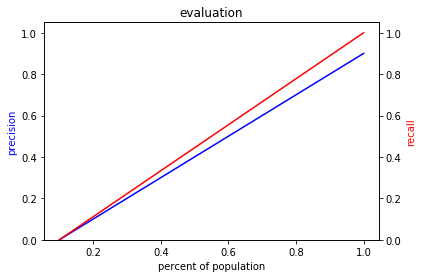

<Figure size 432x288 with 0 Axes>

In [27]:
# output to file?
if ( output_to_file == True ):
    
    # output figure to file
    plot_precision_recall_n( baseline_list, derived_raw_list, "evaluation", output_path_IN = precision_recall_graph_path )

else:
    
    # just output to standard out (as is possible)
    plot_precision_recall_n( baseline_list, derived_raw_list, "evaluation" )

#-- END check to see if output graph to file --#

## output results to file

- Back to [Table of Contents](#Table-of-Contents)

In [28]:
# declare variables
results_file = None
line_list_string = None

# do we output to file?
if ( output_to_file == True ):
    
    # yes.  open output file.
    with open( results_file_path, mode = "w" ) as results_file:

        # join line list with "/n", then write.
        line_list_string = "\n".join( line_list )
        results_file.write( line_list_string )

    #-- END with...as --#    
    
#-- END check to see if we output to file --#